# Software profesional en Acústica 2024-25 (M2i)

*This notebook was adapted from Chapter 1 of [The FEniCS Tutorial Volume I](https://fenicsproject.org/pub/tutorial/sphinx1/) by Hans Petter Langtangen and Anders Logg, released under CC Attribution 4.0 license. It has been created by Xiangmin Jiao (University of Stony Brook University) and it is available in the repository [Unifem/FEniCS-note](https://github.com/unifem/fenics-notes).*

First, we need to install on the fly FEniCS 2019.1.0 using the [FEM on Colab](https://fem-on-colab.github.io/packages.html) install script:

In [14]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"

# The equations of vibrations in linear elasticity

Vibrations in linear elasticity is the study of how solid objects are responding to a mechanical vibration and become 
internally stressed due to prescribed time-harmonic loading conditions. It is an important problem
in modern engineering. Its corresponding PDE is a generalization of the
Helmholtz equation, and it is among one of the most popular PDEs in 
engineering. We now study its variational formulation and how to solve
this problem using FEniCS in 2D.

## PDE problem

The time-harmonic equation governing elastic vibrations of a body $\Omega$ can be written as

\begin{equation}
\tag{1}
-\omega^2\rho\boldsymbol{u} -\mathrm{div}\,\boldsymbol{\sigma} = \boldsymbol{f}\hbox{ in }\Omega,
\end{equation}

where $\boldsymbol{\sigma}$ is the *stress tensor*, and $\boldsymbol{f}$ is the *body force per unit
volume*, $\rho$ is the *mass density*, and $\omega$ the angular frequency. For isotropic materials, the stress tensor is further related to the deformation by 
the following two equations:
\begin{align}
\boldsymbol{\sigma} &= \lambda\,\hbox{tr}\,(\boldsymbol{\varepsilon}) \boldsymbol{I} + 2\mu\boldsymbol{\varepsilon},
\tag{2}\\
\boldsymbol{\varepsilon} &= \frac{1}{2}\left(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top}\right),
\tag{3}
\end{align}
where $\boldsymbol{\varepsilon}$ is the *symmetric strain-rate tensor* (symmetric gradient), 
and $\boldsymbol{u}$ is the *displacement vector field*, $\boldsymbol{I}$ denotes the *identity tensor*, 
$\mathrm{tr}$ denotes the *trace operator* on a tensor, and $\lambda$ and $\mu$ 
are material properties known as *Lamé's elasticity parameters*.

We can combine (2)-(3) to obtain
\begin{equation}
\tag{4}
\boldsymbol{\boldsymbol{\sigma}} = \lambda(\boldsymbol{\nabla}\cdot \boldsymbol{u})\boldsymbol{I} + \mu(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top})
\end{equation}

Note that (1) and (4) can easily be transformed to a single vector PDE for $\boldsymbol{u}$, which is the
governing PDE for the unknown $\boldsymbol{u}$ (Navier's equation).  In the
derivation of the variational formulation, however, it is convenient
to keep the equations split as above.

## Variational formulation

The variational formulation of (1) and (4) consists of forming the inner product of
(1) and a *vector* test function $\boldsymbol{v}\in \hat{V}$, where $\hat{V}$ is a vector-valued test function space, and
integrating over the domain $\Omega$:

\begin{equation} 
-\omega^2\int_\Omega \rho\boldsymbol{u}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}-\int_\Omega (\mathrm{div}\,\boldsymbol{\sigma}) \cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x},\tag{5}
\end{equation}
where $\mathrm{d}\boldsymbol{x}$ denotes the volume measure.

Since $\mathrm{div}\,\boldsymbol{\sigma}$ contains second-order derivatives of the primary
unknown $\boldsymbol{u}$, we integrate this term by parts:
\begin{equation}
-\omega^2\int_\Omega \rho\boldsymbol{u}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}-\int_\Omega (\mathrm{div}\,\boldsymbol{\sigma}) \cdot \boldsymbol{v} \ \mathrm{d}\boldsymbol{x}
= \int_\Omega \boldsymbol{\sigma} : \boldsymbol{\nabla} \boldsymbol{v} \ \mathrm{d}\boldsymbol{x} - \int_{\partial\Omega}
(\boldsymbol{\sigma}\boldsymbol{n})\cdot \boldsymbol{v} \ \mathrm{d}\boldsymbol{s},\tag{6}
\end{equation}

where the colon operator is the inner product between tensors (summed
pairwise product of all elements), $\boldsymbol{n}$ is the outward unit normal
at the boundary, and $\mathrm{d}\boldsymbol{s}$ is a measure in surface area.

The quantity $\boldsymbol{\sigma}\boldsymbol{n}$ is known as the
*traction* or stress vector at the boundary, and is often prescribed
as a boundary condition on a part $\Gamma_{\mathrm{T}}\subset\partial\Omega$ of the boundary 
as $\boldsymbol{\sigma}\boldsymbol{n} = \boldsymbol{g}_{\mathrm{T}}$, whereas the 
remaining part of the boundary either the value of the displacements is prescribed or a free traction boundary is considered.

Substituting (5) into (6), we thus obtain

\begin{equation}
-\omega^2\int_\Omega \rho\boldsymbol{u}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_\Omega \boldsymbol{\sigma} : \boldsymbol{\nabla} \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_{\Gamma_{\mathrm{T}}} \boldsymbol{g}_\mathrm{T}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{s}.\tag{7}
\end{equation}

Inserting the expression (4) for
$\boldsymbol{\sigma}$ gives the variational form with $\boldsymbol{u}$ as unknown. 

### Symmetrizing $\boldsymbol{\nabla} \boldsymbol{v}$

One can show that the inner product of a symmetric tensor $\boldsymbol{A}$ and an
anti-symmetric tensor $\boldsymbol{B}$ vanishes. Since $\boldsymbol{\sigma}$ is a
symmetric tensor, if we express $\boldsymbol{\nabla} \boldsymbol{v}$ as a sum
of its symmetric and anti-symmetric parts, only the symmetric part will
survive in the product $\boldsymbol{\sigma} :\boldsymbol{\nabla} \boldsymbol{v}$. Thus replacing $\boldsymbol{\nabla} \boldsymbol{u}$ by the symmetric gradient gives rise to the slightly different variational form

\begin{equation}
-\omega^2\int_\Omega \rho\boldsymbol{u}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_\Omega \boldsymbol{\sigma} : \boldsymbol{\epsilon}(\boldsymbol{v})\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_{\Gamma_\mathrm{T}} \boldsymbol{g}_\mathrm{T}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{s}
\tag{8}
\end{equation}

where $\boldsymbol{\epsilon}(\boldsymbol{v})$ is the symmetric part of $\boldsymbol{\nabla} \boldsymbol{v}$:
\begin{equation}
\boldsymbol{\epsilon}(\boldsymbol{v}) = \frac{1}{2}\left(\boldsymbol{\nabla} \boldsymbol{v} + (\boldsymbol{\nabla} \boldsymbol{v})^{\top}\right).
\tag{9}
\end{equation}

The formulation (\ref{ftut-elast-varform-sigma_inner_gradv}) is what naturally
arises from the minimization of elastic potential energy, and is a more
popular formulation than (7).

Here, $\boldsymbol{\epsilon}$ is a useful operator. The symmetric strain-rate tensor $\boldsymbol{\varepsilon}$ in (3) is equal to $\boldsymbol{\epsilon}(\boldsymbol{u})$. 

### Enforcing boundary conditions

Now let us consider how to enforce boundary conditions. 
For Dirichlet boundaries, we will enforce boundary-conditions strongly.
For these points, no test functions are associated with the Dirichlet nodes.

For traction boundary conditions, we will enforce the boundary condition
weakly using the variational form (8).
Similar to the Helmholtz equation, we require their corresponding test
functions $\boldsymbol{v}$ vanish along $\partial \Omega$ for interior points.
Then, the boundary integral above has no effects for points on
$\partial\Omega\setminus\Gamma_\mathrm{T}$.

### Summary of variational form
In summary, the variational problem is to find $\boldsymbol{u}$ in a vector function space $\hat{V}$ such that

\begin{equation}
a(\boldsymbol{u},\boldsymbol{v}) = L(\boldsymbol{v})\quad\forall \boldsymbol{v}\in\hat{V},\tag{10}
\end{equation}
where 

\begin{align}
a(\boldsymbol{u},\boldsymbol{v}) &= -\omega^2\int_\Omega \rho\boldsymbol{u}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_\Omega\sigma(\boldsymbol{u}) :\varepsilon(\boldsymbol{v})\ \mathrm{d}\boldsymbol{x},\tag{11}\\
L(\boldsymbol{v}) &= \int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} + \int_{\Gamma_{\mathrm{T}}} \boldsymbol{g}_{\mathrm{T}}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{s}\tag{12},
\end{align}
and 

\begin{equation}
\boldsymbol{\sigma}(\boldsymbol{u}) = \lambda(\boldsymbol{\nabla}\cdot \boldsymbol{u})\boldsymbol{I} + \mu(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top}).\tag{13}\\
\end{equation}

## FEniCS implementation

To demonstrate the implementation, we will model a clamped beam deformed under a time-harmonic surface force on the opposite free cross-section surface. This can be modeled by setting $\boldsymbol{g}_{\mathrm{T}}=(0,0,1)$ on that boundary part $x=L$. The beam is
box-shaped with length $L$ and has a square cross section of width $W$. We
set $\boldsymbol{u}=(0,0,0)$ on the clamped end, $x=0$. The rest of the lateral boundary is
traction free (so, no other boundary contributions are involved in the variational formulation). Therefore,
$$L(\boldsymbol{v}) = \int_{\Gamma_{\mathrm{T}}} \boldsymbol{g}_{\mathrm{T}}\cdot \boldsymbol{v} \mathrm{d}\boldsymbol{s}$$
for this problem.

### Import packages

We start by importing FEniCS 2019 and matplotlib. In addition, we import `mshr` for mesh generation.

In [2]:
import numpy as np
from dolfin import *
import ufl_legacy as ufl
from mshr import *
import matplotlib.pyplot as plt

### Generate the mesh and function spaces

Our action startes by generating meshes and defining function spaces.

In [3]:
# Create mesh and define function space
length = 1; width = 0.2

mesh = RectangleMesh(Point(0, 0), Point(length, width), 50, 10, "right/left")
V = VectorFunctionSpace(mesh, 'P', 1)

### Define the variational problem

The primary unknown is now a vector field $\boldsymbol{u}$ and not a scalar field,
so we need to work with a vector function space. We will use 
piecewise-linear basis functions for all the components.


In [4]:
u = TrialFunction(V)
v = TestFunction(V)

With `u = TrialFunction(V)` we get `u` as a vector-valued finite element
function with three components for this 2D problem.

Next, we define the stress tensor and $a$. The gradient and divergence operators 
now have a prefix `nabla_`.
This is not strictly necessary in the present problem, but is
recommended in general for vector PDEs arising from continuum mechanics,
if you interpret $\boldsymbol{\nabla}$ as a vector in the PDE notation. See
the notes on `grad(u)` vs. `nabla_grad(u)` below.

In [5]:
# Define strain and stress
def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    #return sym(nabla_grad(u))

# Physical constants
rho = 1.
omega = 2*np.pi*3
beta = 1.25
lambda_ = beta
mu = 1
d = u.geometric_dimension()  # space dimension

def sigma(u):
    return lambda_*ufl.nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

# Define a
a = -omega**2*rho*inner(u, v)*dx + inner(sigma(u), epsilon(v))*dx

To define the partition of the boundary in the computational domain, each face of the finite element mesh is marked with a number flag or *marker*:

In [6]:
# Initialize subdomain and boundary markers
tol = 1e-3
clamped_boundary = CompiledSubDomain('on_boundary and near(x[0],L,tol)', L=0., tol=tol)
traction_boundary = CompiledSubDomain('on_boundary and near(x[0],L,tol)', L=length, tol=tol)

# Initialize mesh function for boundary
boundary_markers = MeshFunction('size_t', mesh, mesh.topology().dim() - 1)
boundary_markers.set_all(0)
clamped_boundary.mark(boundary_markers, 1) 
traction_boundary.mark(boundary_markers, 2)

# Define the boundary measure with the boundary markers
ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

To define $L$, $\boldsymbol{f}=(0, 0, 1)$ is a constant vector, instead of a scalar.
Such a vector constant is specified as `Constant(0, 0, 1)` in FEniCS.

In [7]:
# Define L
f = Constant((0, 1))
L = dot(f, v)*ds(2)

### Define boundary conditions

We only specify the Dirichlet boundary condition. For the boundary condition 
$u=(0, 0, 0)$, we must set a vector value to zero, not just a scalar. 
We specify the vector constant as `Constant((0, 0, 0))`.

In [8]:
# Define boundary condition
bc = DirichletBC(V, Constant((0, 0)), boundary_markers, 1)

### Solve the variational problem

Finally, we can solve the problem.

In [9]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


### Plot the solution

Any component of the solution can be computed or even the modulus of the vector-field solution

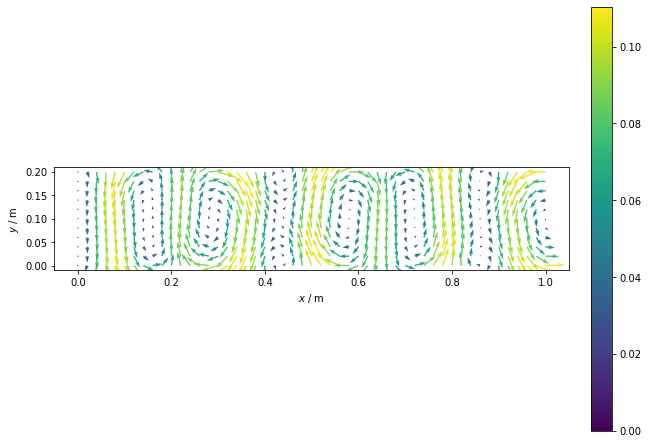

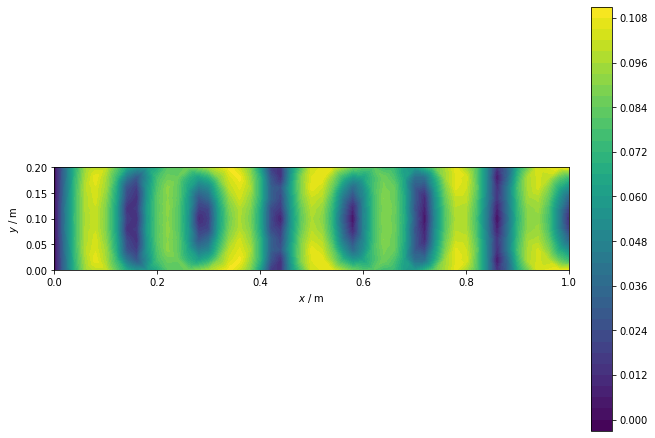

In [11]:
# Plot the Finite Element approximation
def plot_solution(u):
    '''plot solution of FEM-based simulation'''
    fig = plt.figure(figsize=(10,10))
    fig = plot(u)
    plt.xlabel(r'$x$ / m')
    plt.ylabel(r'$y$ / m')
    plt.colorbar(fig, fraction=0.038, pad=0.04);
    
# Plot vector field   
plot_solution(u)

# Compute magnitude of displacement
u_magnitude = sqrt(dot(u, u))
Q = FunctionSpace(mesh, 'P', 1)
u_magnitude = project(u_magnitude, Q)
plot_solution(u_magnitude)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


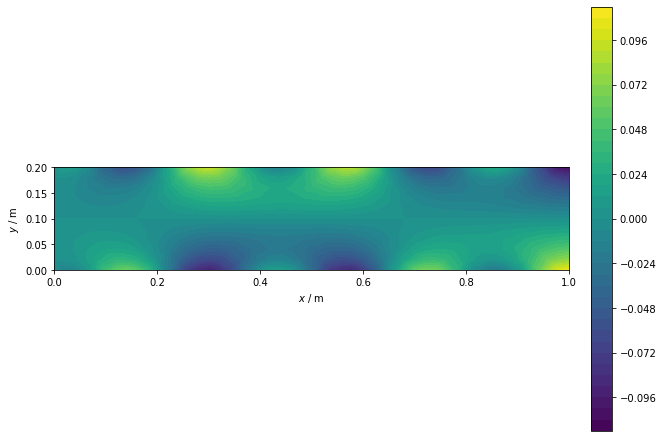

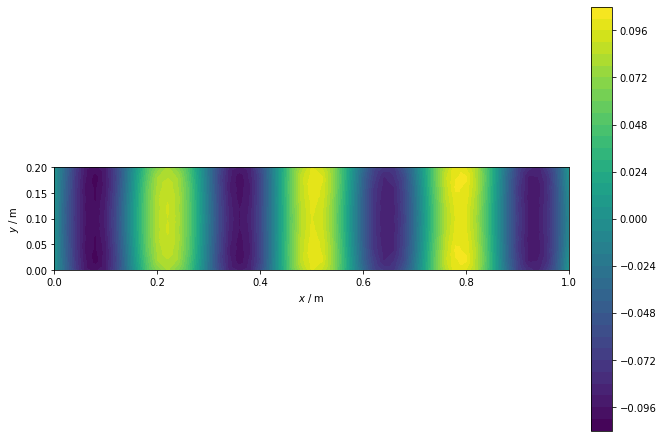

In [12]:
# Plot second component of the solution
plot_solution(u[0])
plot_solution(u[1])

## Note on `grad(u)` vs. `nabla_grad(u)`

For scalar functions, $\boldsymbol{\nabla} u$ has a clear meaning as the vector
$$\boldsymbol{\nabla} u =\left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y},
\frac{\partial u}{\partial z}\right).$$

However, for a vector-valued function $\boldsymbol{u}$, the meaning is less clear.
Some sources define $\boldsymbol{\nabla}\boldsymbol{u}$ as the matrix with elements
$\partial u_j / \partial x_i$, especially in continuum mechanics.
Some other sources prefer $\partial u_i / \partial x_j$, such as in the 
*Jacobian matrix*.

In our notes, $\boldsymbol{\nabla}$ always denotes the matrix 
with elements $\partial u_j / \partial x_i$, to be consistent with most PDEs.
The corresponding operator in FEniCS is `nabla_grad(u)`.
For the Jacobian matrix, its corresponding operator in FEniCS is `grad(u)`.